# Biographical Analysis
Dastan Abdulla  
Ling 1340: Data Science for Linguists  
02/21/2024  

In [35]:
# Imports
import pandas as pd
import numpy as np
# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [36]:
# Reloading the data frame
saa_df = pd.read_pickle("../data/df_report2.pkl")

In [37]:
saa_df.sample(10)

,speakerid,native_language,city,state_or_province,country,age,gender,onset_age,english_residence,length_of_residence,learning_style,speech_sample,phonetic_transcription,ethnologue_language_code,transcription
2550,2555,japanese,ako,NaN,japan,30.0,female,12.0,australia,10.0,academic,japanese33.wav,None,jpn,None
1623,1623,farsi,abadan,NaN,iran,54.0,female,38.0,usa,16.0,naturalistic,farsi16.wav,farsi16.rtf,pes,[plis kʰɑl ɛ̆stɛla ask hɛr tʰŭ bə̆rɪ̃ŋ d̪iːs ...
1797,1797,spanish,madrid,NaN,spain,46.0,male,12.0,usa,13.0,academic,spanish117.wav,None,spa,None
2067,2068,miskito,bilwi,puerto cabezas,nicaragua,18.0,female,7.0,NaN,0.0,academic,miskito2.wav,None,miq,None
1018,1017,hindi,durgapur,west bengal,india,31.0,male,4.0,usa,8.0,academic,hindi9.wav,hindi9.rtf,hin,[plis kaʊ̆l stɛlə ask hə ɾə bɹɪ̃ŋ diz tɪ̃ŋs wɪ...
1114,1114,italian,rome,NaN,italy,19.0,male,11.0,NaN,0.0,academic,italian19.wav,italian19.rtf,ita,[pʰliːs kɔl stɛlːə ask ɛɹ tu bɹɪ̃ŋ dɪs θĩnz w...
814,813,greek,igoumenitsa,NaN,greece,62.0,female,12.0,usa,44.0,academic,greek6.wav,greek6.rtf,ell,[pəliz̥ kɔl stɛla ɛsk ɛɹ tu bɹĩŋ ðɪs θĩŋs wɪ...
526,525,english,sydney,NaN,australia,31.0,male,0.0,australia,31.0,naturalistic,english148.wav,english148.rtf,eng,[pʰliːz̥ kʰɔːlˠ stɛlə ask hə ɾə bɹɪ̃ŋ n̪iːz̥ θ...
1180,1182,kalanga,francistown,NaN,botswana,30.0,male,9.0,"botswana, usa",30.0,academic,kalanga1.wav,kalanga1.rtf,kck,[pʰliz kʰɑl stɛla æs hɛ tʰu brɪ̃n ðɪs θĩnz wɪ...
6,7,amharic,arba minch,NaN,ethiopia,23.0,male,7.0,usa,2.0,academic,amharic2.wav,amharic2.rtf,amh,[bə̆liz kʰɔl stelɐ æsk hɛr tu bɹɪː̃ŋ d̪os t̪ɪ̃...


## General Biographical Analysis

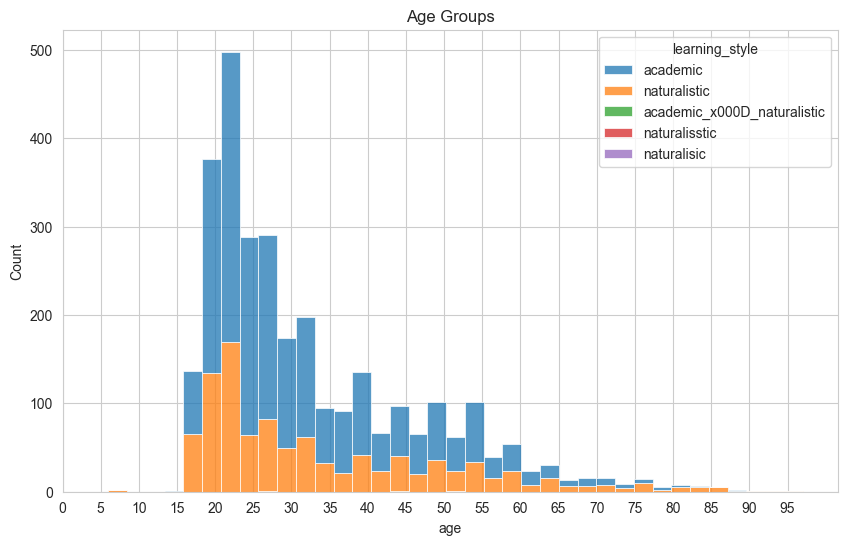

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(
    saa_df,
    x="age", hue="learning_style",
    multiple="stack",
    linewidth=.5,
)
plt.title('Age Groups')
plt.xticks(np.arange(0, 100, 5))
plt.show()

In [39]:
# Let's fix those label typos
def correct_typos(value):
    corrections = {
        'academic_x000D_naturalistic': 'academic_naturalistic',
        'naturalisstic': 'naturalistic',
        'naturalisic': 'naturalistic'
    }
    return corrections.get(value, value)

saa_df['learning_style'] = saa_df['learning_style'].apply(correct_typos)

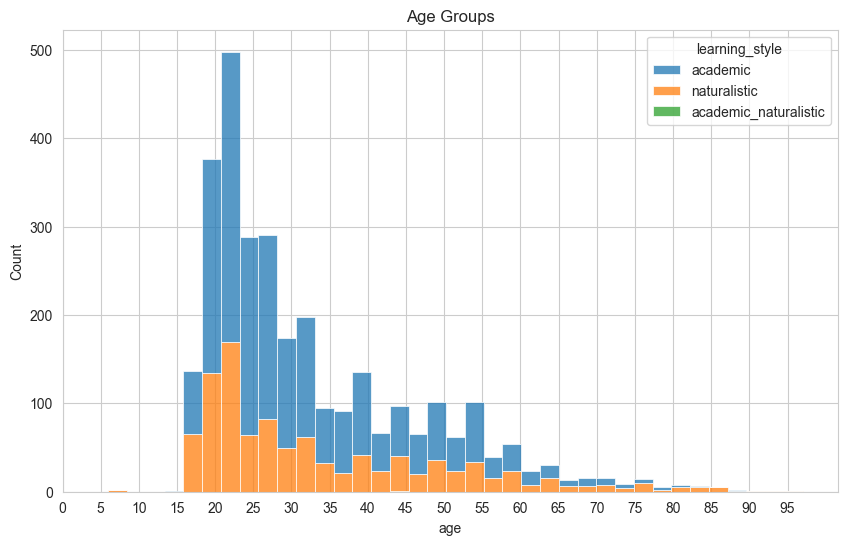

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(
    saa_df,
    x="age", hue="learning_style",
    multiple="stack",
    linewidth=.5,
)
plt.title('Age Groups')
plt.xticks(np.arange(0, 100, 5))
plt.show()

* That's strange, let's examine and see why there is almost no learning style reported for ages younger than ~16

In [41]:
young_subset = saa_df[saa_df['age'] < 18]
young_subset.head(50)

,speakerid,native_language,city,state_or_province,country,age,gender,onset_age,english_residence,length_of_residence,learning_style,speech_sample,phonetic_transcription,ethnologue_language_code,transcription
28,29,bambara,bamako,NaN,mali,15.5,female,12.0,usa,0.4,academic,bambara1.wav,bambara1.rtf,bam,[pliːs kɔl stela ʔæ̆sk hɜɹ tŭ brɪ̃ŋ d̪iz t̪ɪ̃...
71,72,english,norton,virginia,usa,7.0,female,0.0,usa,7.0,naturalistic,english15.wav,english15.rtf,eng,[pʰləĭz kʰaːlˠ stəɛlə æsk hɝ tʰə bɹəɪ̃ŋ ðəĭz...
343,344,spanish,bogota,NaN,colombia,17.0,female,16.0,usa,0.1,academic,spanish3.wav,spanish3.rtf,spa,[plis kʰɔːl estela æsx heɹ tŭ bɹĩṉ d̪iz̥ θi...
354,355,synthesized,NaN,NaN,NaN,0.0,male,0.0,mac system 8.5,0.0,NaN,synthesized1.wav,None,NaN,None
355,356,synthesized,NaN,NaN,NaN,0.0,female,0.0,mac system 8.5,0.0,NaN,synthesized2.wav,None,NaN,None
356,357,synthesized,NaN,NaN,NaN,0.0,female,0.0,mac system 8.5,0.0,NaN,synthesized3.wav,None,NaN,None
357,358,synthesized,NaN,NaN,NaN,0.0,male,0.0,mac system 8.5,0.0,NaN,synthesized4.wav,None,NaN,None
1216,1216,english,washington,district of columbia,usa,6.0,male,0.0,usa,6.0,naturalistic,english335.wav,None,eng,None


It appears that we simply do not have many entries for people who are younger than 18 years old which would explain the original skew in the data. That is very significant information to know about the data as any conclusions we draw from this point onwards, may not necessarily apply to people under 18.

### Ethnologue and Language Representation

In [42]:
# Let's look at what languages are represented in the saa
saa_df['ethnologue_language_code'].unique()

array(['afr', 'any', 'als', 'aln', 'amh', 'ars', 'arz', 'aeb', 'acm',
       'apc', 'abv', 'afb', 'ary', 'ayn', 'ajp', 'hye', 'azj', 'fmp',
       'bsp', 'bca', 'bam', 'bax', 'bqe', 'ben', 'bos', 'bul', 'yue',
       'cal', 'cat', 'cha', 'ces', 'dan', 'gbz', 'nld', 'igb', 'bin',
       'eng', 'ewe', 'fak', 'aka', 'pes', 'fin', 'fra', 'fri', 'kat',
       'deu', 'ell', 'guj', 'guz', 'heb', 'hin', 'hsn', 'hun', 'ibo',
       'ind', 'ita', 'jpn', 'kan', 'kaz', 'khm', 'kir', 'swh', 'kor',
       'kri', 'ckb', 'slp', 'lao', 'lav', 'lit', 'luo', 'mkd', 'zlm',
       'mal', 'cmn', 'emk', 'mar', 'mfe', 'khk', 'mos', 'mrl', 'npi',
       'nor', 'gaz', 'pon', 'pol', 'por', 'pnb', 'pan', 'quh', 'qvh',
       'ron', 'rus', 'sdn', 'swy', 'stw', 'srp', 'scn', 'sin', 'slk',
       'som', 'spa', 'swe', nan, 'tgl', 'tlg', 'tam', 'tat', 'tel', 'tha',
       'bod', 'tir', 'tpi', 'tur', 'urd', 'uig', 'uzn', 'uzs', 'vie',
       'wof', 'ydd', 'zul', 'mlt', 'gcf', 'yor', 'dib', 'bel', 'isl',
       'snd', '

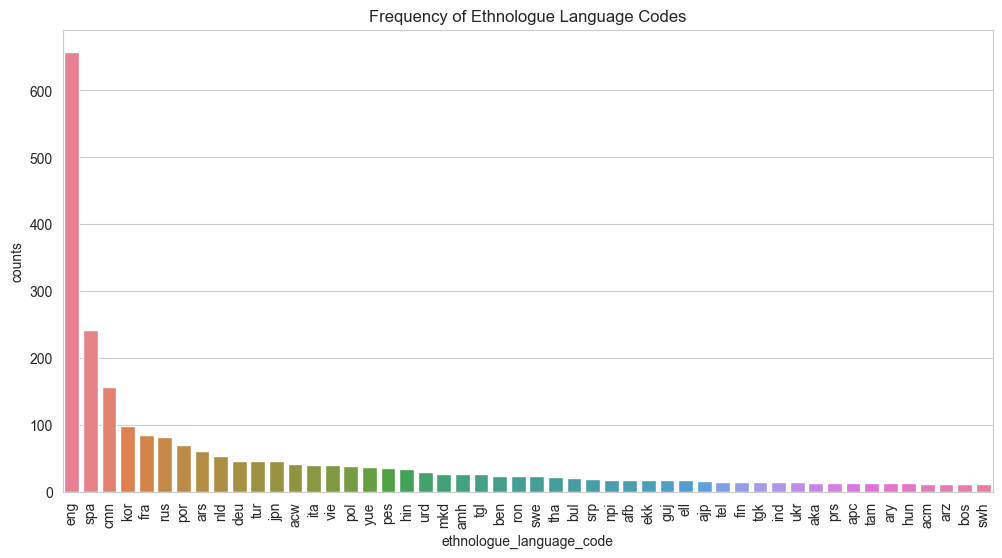

In [43]:
top_n = 50
plt.figure(figsize=(12, 6))  
saa_df_sorted = saa_df['ethnologue_language_code'].value_counts().nlargest(top_n).reset_index()
saa_df_sorted.columns = ['ethnologue_language_code', 'counts']  
sns.barplot(x='ethnologue_language_code', y='counts', data=saa_df_sorted, hue="ethnologue_language_code")

plt.xticks(rotation=90) 
plt.title('Frequency of Ethnologue Language Codes')
plt.show()

* It seems like english is the most represented in the data, with Spanish and Mandarin chinese coming in second and third.

### Length of Residency and Onset Age

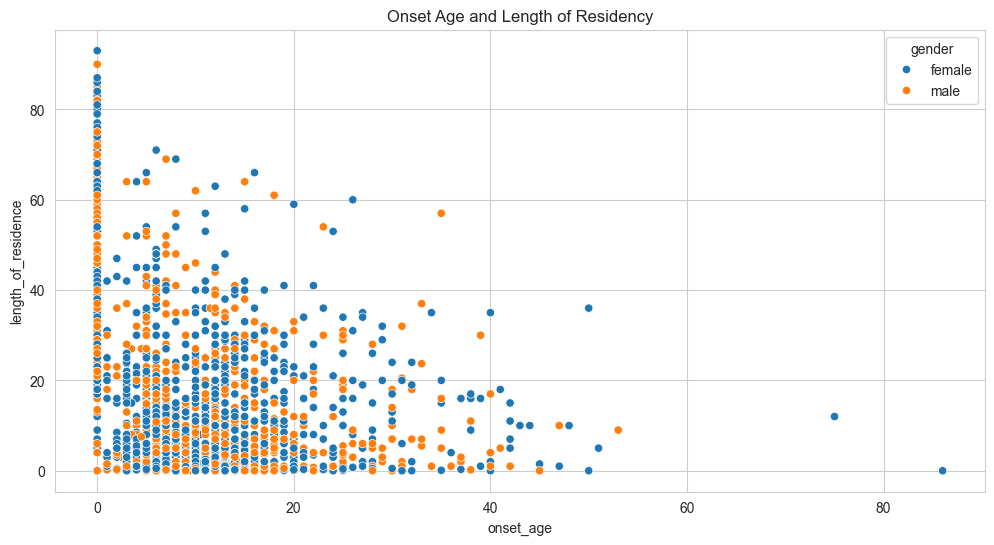

In [44]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(x='onset_age', y='length_of_residence', data=saa_df, hue="gender")
plt.title('Onset Age and Length of Residency')
plt.show()

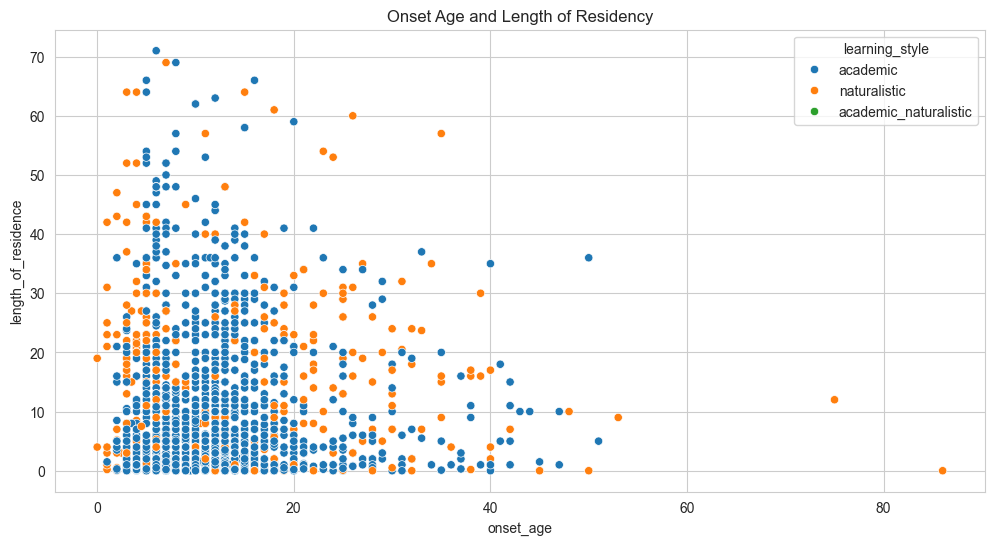

In [45]:
# let's exclude the native english speakers since it's clearly skewing the data
plt.figure(figsize=(12, 6)) 
non_native = saa_df[saa_df['native_language'] != 'english']
sns.scatterplot(x='onset_age', y='length_of_residence', data=non_native, hue="learning_style")
plt.title('Onset Age and Length of Residency')
plt.show()

* It appears that there is trend in which, the earlier the speakers are exposed to english, the longer their length of residence in the location they began to learn it.

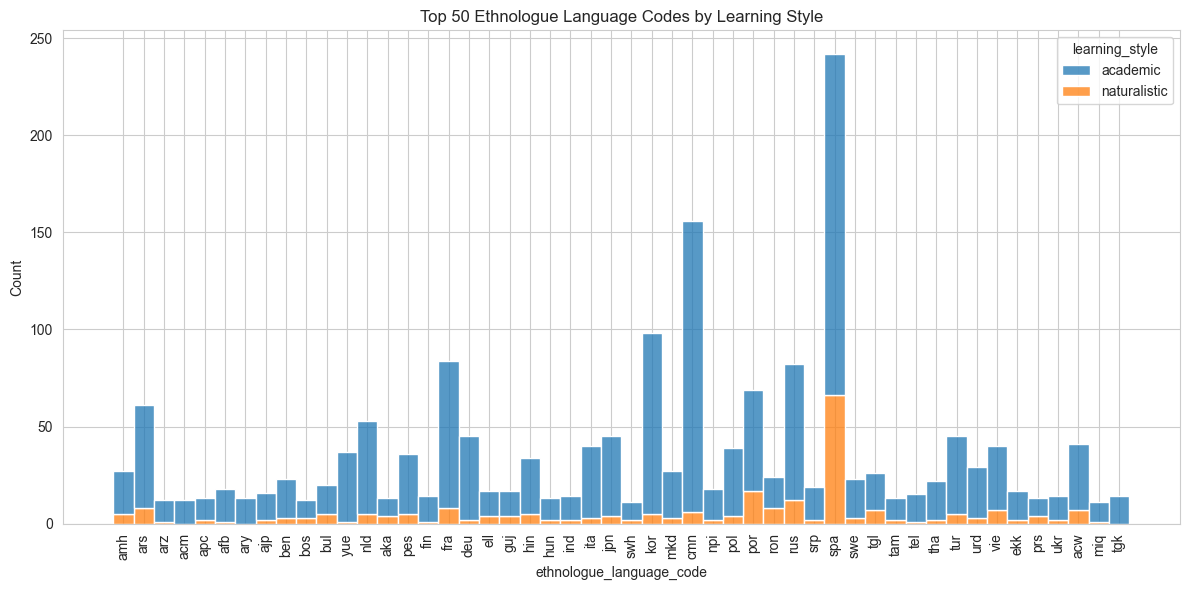

In [46]:
# Again excluding english
df_without_eng = saa_df[saa_df['ethnologue_language_code'] != 'eng']
code_counts = df_without_eng['ethnologue_language_code'].value_counts()
top_codes = code_counts.head(50).index
top_df = df_without_eng[df_without_eng['ethnologue_language_code'].isin(top_codes)]

plt.figure(figsize=(12, 6)) 
sns.histplot(data=top_df, x='ethnologue_language_code', hue='learning_style', multiple='stack')

plt.xticks(rotation=90)
plt.title('Top 50 Ethnologue Language Codes by Learning Style')
plt.tight_layout() 

plt.show()

* Out of the top 50 represented ethnologue languages in the dataset, it seems the majority of the speakers learned english academically across each ethnologue. 

### Gender and Learning Style

In [56]:
# Filter to make learning style binary
filtered_df = saa_df[saa_df['learning_style'].isin(['academic', 'naturalistic'])]

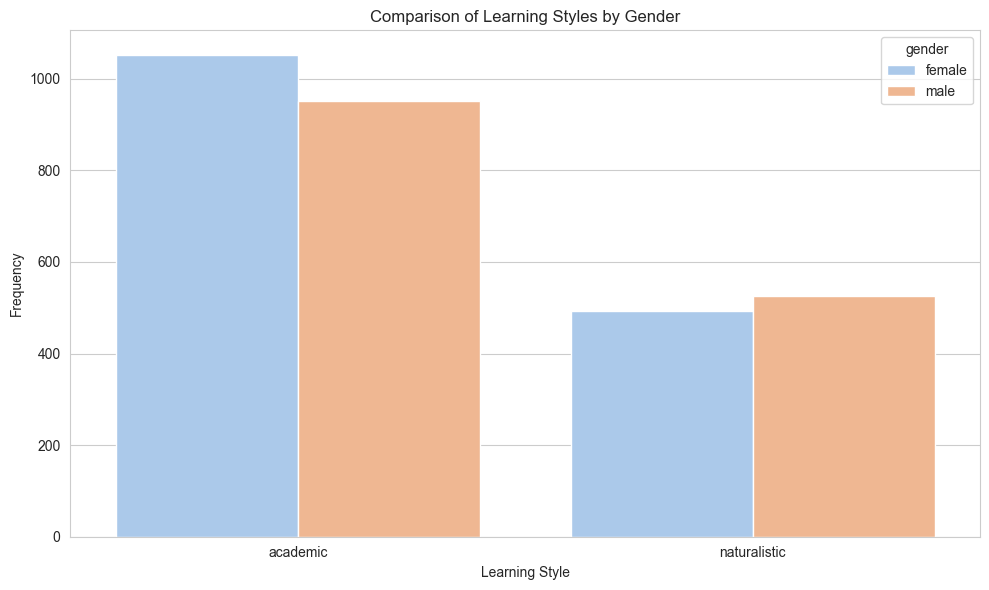

In [57]:
plt.figure(figsize=(10, 6))

# Create a bar plot with gender as hue to compare frequencies
ax = sns.countplot(x='learning_style', hue='gender', data=filtered_df, palette='pastel')

ax.set_title('Comparison of Learning Styles by Gender')
ax.set_ylabel('Frequency')
ax.set_xlabel('Learning Style')

# Show the plot
plt.tight_layout()
plt.show()

* Now let's see what would happen if we exclude native English speakers.

In [58]:
# Excluding english speakers
filtered_df = filtered_df[filtered_df['native_language'] != 'english']

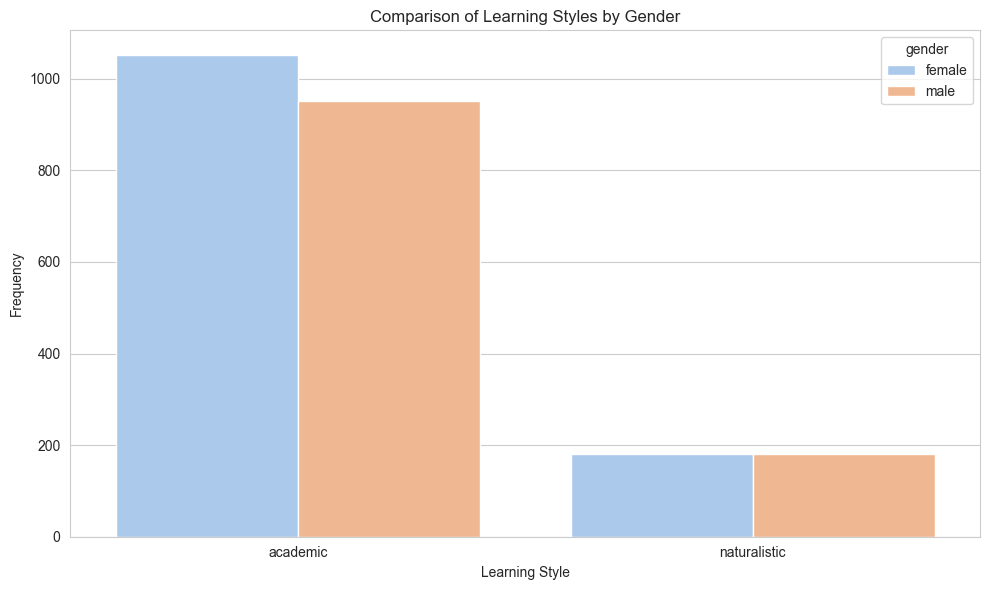

In [59]:
plt.figure(figsize=(10, 6))

# Create a bar plot with gender as hue to compare frequencies
ax = sns.countplot(x='learning_style', hue='gender', data=filtered_df, palette='pastel')

ax.set_title('Comparison of Learning Styles by Gender')
ax.set_ylabel('Frequency')
ax.set_xlabel('Learning Style')

# Show the plot
plt.tight_layout()
plt.show()

* We can see that a dramatic number of non-native speakers become exposed to and learn english through an academic setting.